## Plot Ripple Statistics - Single Day

This file does the following
1. Load in ripple statistic (inter_ripple_interval, ripple_center_frequency, ripple_peak_latency, avg_ripple_spectogram) data for "day_num" parameter. **You must specify this parameter in the first cell.**
2. Plots distributions of the three ripple statistics included and labels n-count, mean, and p-value from Mann-Whitney U test. Note: the inter_ripple_interval is limited to look at values < 1ms.
3. Not included here, but if you are interested I can share code about how to plot the avg_ripple_spectogram.

Parameter = "day_num" (default = 0)

0 = Disruption Day1

1 = Disruption Day3

2 = Control Day4

3 = Control Day5

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import nelpy as nel
import nelpy.plotting as npl
import jagular as jag
import ghostipy as gsp
from numpy.fft import fft
import logging
import logging.config
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
logging.basicConfig(level=logging.ERROR) 
warnings.simplefilter("ignore", UserWarning)

# *******PARAMETER*******: Change the Value of day_num to the recording day that you are interested in and run the next two cells
# 0 = Disruption Day1
# 1 = Disruption Day3
# 2 = Control Day4
# 3 = Control Day5

day_num = 0

pref = ''
day_path = ["Disruption_Day1/", "Disruption_Day3/", "Control_Day4/", "Control_Day5/"]
day = ["Day 1 (Disruption)", "Day 3 (Disruption)", "Day 4 (Control)", "Day 5 (Control)"]

prefix = pref + day_path[day_num]
day = day[day_num]

rec_list = ['preFamSleep', 'postTestSleep']


## Load data of ripple statistics (based on day_num)

In [16]:
path = prefix + 'inter_ripple_interval.npy'
inter_ripple_interval = np.load(path, allow_pickle=True).item()
print("load inter_ripple_interval")

path = prefix + 'ripple_center_frequency.npy'
ripple_center_frequency = np.load(path, allow_pickle=True).item()
print("load ripple_center_frequency")

path = prefix + 'ripple_peak_latency.npy'
ripple_peak_latency = np.load(path, allow_pickle=True).item()
print("load ripple_peak_latency")

path = prefix + 'avg_ripple_spectogram.npy'
avg_ripple_spectogram = np.load(path, allow_pickle=True).item()
print("load avg_ripple_spectogram")

load inter_ripple_interval
load ripple_center_frequency
load ripple_peak_latency
load avg_ripple_spectogram


## Plot Data (based on day_num)

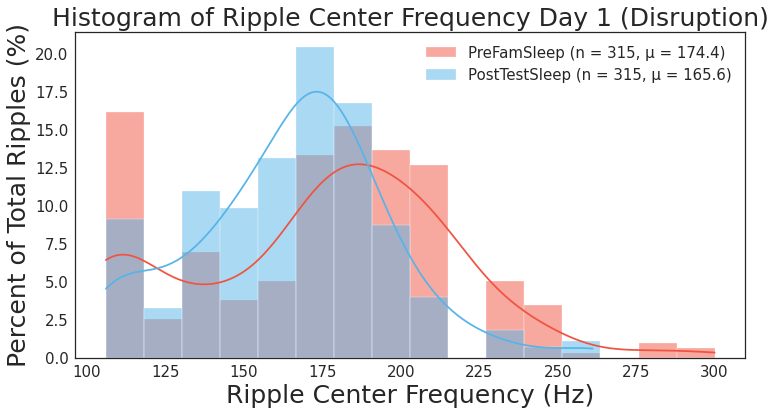

p-value =  0.0


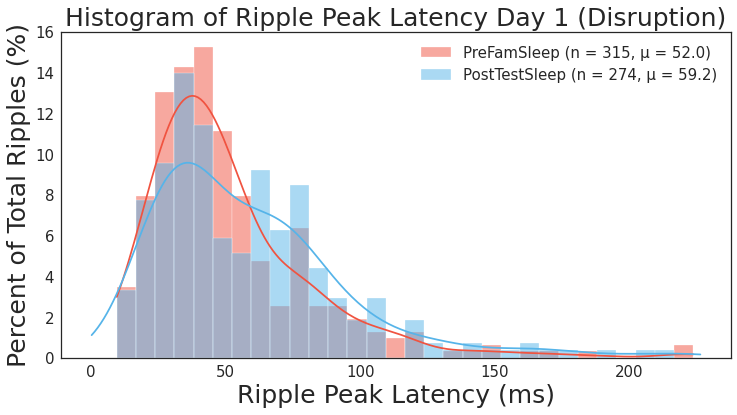

p-value =  0.008


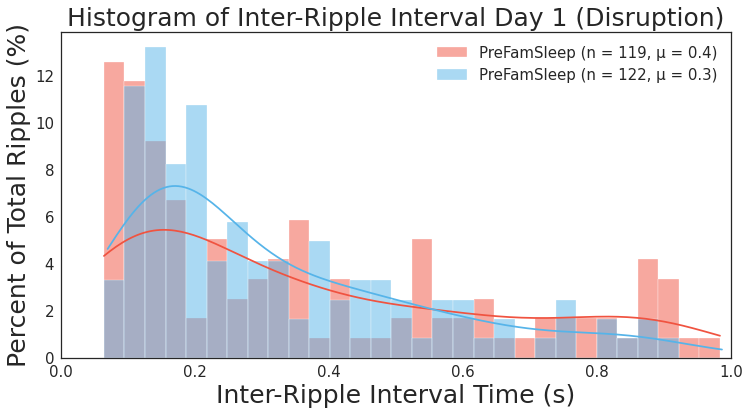

p-value =  0.351


In [21]:
# The legend on the plots label as PreFamSleep or PostTestSleep and the number of ripples used for the calculation
# the p-value from Mann-Whitney U Test (comparing PreFamSleep to PostTestSleep) is printed below each figure
num_ripples = []
num_ripples.append(len(ripple_center_frequency['preFamSleep']))
num_ripples.append(len(ripple_center_frequency['postTestSleep']))
# savepath = define here

# Plot Ripple Center Frequency
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
data= ripple_center_frequency['preFamSleep']
bins = np.histogram_bin_edges(data, bins=16)
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(ripple_center_frequency['preFamSleep'], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)
data2 = ripple_center_frequency['postTestSleep']
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(data2, bins=bins, color=npl.colors.sweet.blue,  edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data)) + mu)
ax.set_title("Histogram of Ripple Center Frequency " + day)
ax.set_xlabel("Ripple Center Frequency (Hz)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'ripple_center_frequency.png')
plt.show()
pvalue = mannwhitneyu(data,data2).pvalue
print("p-value = ", round(pvalue,3))

# Plot Ripple Center Latency
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
bins = np.histogram_bin_edges(ripple_peak_latency['preFamSleep']*1000, bins=30)
data = ripple_peak_latency['preFamSleep']*1000
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(data, bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)
data2 = ripple_peak_latency['postTestSleep']*1000
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(ripple_peak_latency['postTestSleep']*1000, bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep (n = "+str(len(data2)) + mu)
ax.set_title("Histogram of Ripple Peak Latency " + day)
ax.set_xlabel("Ripple Peak Latency (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'ripple_peak_latency.png')
plt.show()
pvalue = mannwhitneyu(data, data2).pvalue
print("p-value = ", round(pvalue,3))

# Plot Inter Ripple Interval
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
# Limit is used to only look at the ripples that are closer than 1 second apart
limit = np.where(inter_ripple_interval['preFamSleep'] < 1)
bins = np.histogram_bin_edges(inter_ripple_interval['preFamSleep'][limit], bins=30)
data = inter_ripple_interval['preFamSleep'][limit]
mu = ", μ = " + str(round(np.mean(data), 1)) + ")"
sns.histplot(data, bins=bins, edgecolor='w', color=npl.colors.sweet.red, kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data)) + mu)

limit = np.where(inter_ripple_interval['postTestSleep'] < 1)
data2 = inter_ripple_interval['postTestSleep'][limit]
mu = ", μ = " + str(round(np.mean(data2), 1)) + ")"
sns.histplot(data2, bins=bins, edgecolor='w', color=npl.colors.sweet.blue, kde=True, stat = "percent", label="PreFamSleep (n = "+str(len(data2)) + mu)
data2 = inter_ripple_interval['postTestSleep'][limit]
ax.set_title("Histogram of Inter-Ripple Interval " + day)
ax.set_xlabel("Inter-Ripple Interval Time (s)")
ax.set_ylabel("Percent of Total Ripples (%)")
ax.set_xlim(0,1)
plt.legend()
# plt.savefig(save_path + 'inter_ripple_interval.png')
plt.show()
pvalue = mannwhitneyu(data, data2).pvalue
print("p-value = ", round(pvalue,3))
